In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [4]:
%matplotlib inline

# 柱状图

## version I

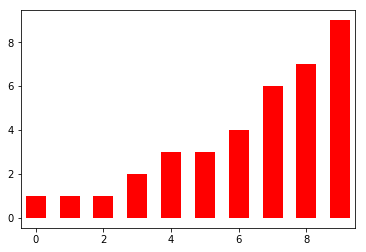

In [8]:
y = np.random.randint(0,10,(10))
y = sorted(y)
plt.vlines(np.arange(10),ymin=0, ymax=y,
           colors='r',linestyles='solid',
          linewidth=20)
plt.show()

## exercise

In [5]:
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

In [6]:
df = df_raw[["cty","manufacturer"]].groupby("manufacturer").mean()

In [7]:
df.sort_values('cty',inplace=True)
df.reset_index(inplace=True)

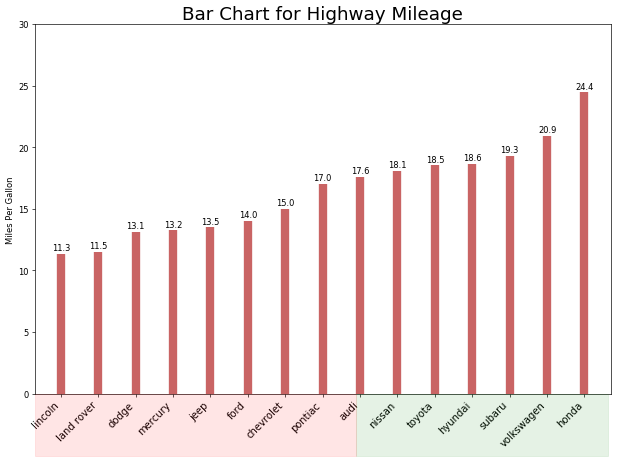

In [20]:
fig = plt.figure(figsize=(12,8),dpi=60)
ax = fig.add_axes((0.1,0.13,0.8,0.77))

# draw bar chart
ax.vlines(x=df.index, ymin=0, ymax=df.cty, 
          color='firebrick', alpha=.7, linewidth=10)

# set text
for x,y in zip(df.index,df.cty):
    ax.text(x,y+0.5,round(y,1),
           va='center',ha='center')

# draw patch
p1 = patches.Rectangle((.546,0), 
                       width=0.35,height=0.13,
                       color='g',alpha=.1,
                      transform=fig.transFigure)
p2 = patches.Rectangle((0.1,0),
                      width=0.446,height=0.13,
                      alpha=.1,color='r',
                      transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)

# set title
ax.set_title('Bar Chart for Highway Mileage',fontsize=22)

# set xlael
ax.set_ylabel('Miles Per Gallon')
ax.set_ylim(0,30)

# set tick
ax.set_xticks(df.index)
ax.set_xticklabels(df.manufacturer,
                   rotation=45,ha='right',fontsize=12)
plt.show()

# 棒棒糖图

In [21]:
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

In [22]:
df = df_raw[["cty","manufacturer"]].groupby("manufacturer").mean()
df.sort_values('cty',inplace=True)
df.reset_index(inplace=True)

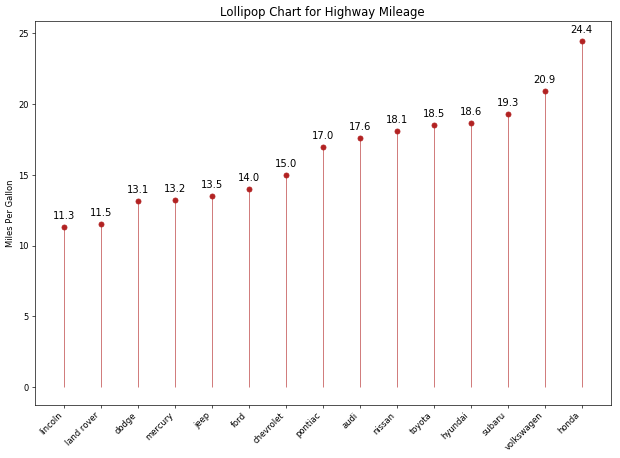

In [39]:
fig = plt.figure(figsize=(12,8),dpi=60)
ax = fig.add_axes((0.1,0.1,0.8,0.8))

# draw bar chart
ax.vlines(x=df.index, ymin=0, ymax=df.cty, 
          color='firebrick', alpha=.7, linewidth=1)

# plot scatter
ax.scatter(df.index,df.cty, color='firebrick')

# annotate
for x,y in zip(df.index,df.cty):
    ax.text(x,y+0.8,round(y,1),fontsize=12,va='center',ha='center')

# set title
ax.set_title('Lollipop Chart for Highway Mileage',fontsize=14)

# set label
ax.set_ylabel('Miles Per Gallon')

# set xaxis tick
ax.xaxis.set_ticks(df.index)
ax.xaxis.set_ticklabels(df.manufacturer,rotation=45,ha='right')
plt.show()

# 包点图

In [40]:
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

In [41]:
df = df_raw[["cty","manufacturer"]].groupby("manufacturer").mean()
df.sort_values('cty',inplace=True)
df.reset_index(inplace=True)

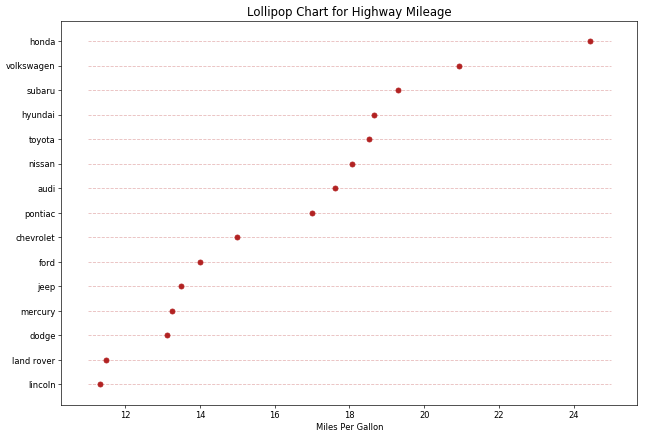

In [54]:
fig = plt.figure(figsize=(12,8),dpi=60)
ax = fig.add_axes((0.1,0.1,0.8,0.8))

# draw bar chart
ax.hlines(y=df.index, xmin=11, xmax=25, 
          color='firebrick', alpha=.3, linewidth=1,
         linestyle='dashed')

# plot scatter
ax.scatter(df.cty,df.index, color='firebrick')

# set title
ax.set_title('Lollipop Chart for Highway Mileage',fontsize=14)

# set label
ax.set_xlabel('Miles Per Gallon')

# set xaxis tick
ax.yaxis.set_ticks(df.index)
ax.yaxis.set_ticklabels(df.manufacturer)
plt.show()

## 坡度图

In [78]:
import matplotlib.lines as lines

In [55]:
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/gdppercap.csv")

In [57]:
df_raw

,continent,1952,1957
0,Africa,1252.572466,1385.236062
1,Americas,4079.062552,4616.043733
2,Asia,5195.484004,4003.132940
3,Europe,5661.057435,6963.012816
4,Oceania,10298.085650,11598.522455


In [60]:
left_label = [x+','+str(round(y)) for x,y in zip(df_raw.continent,df_raw['1952'])]
right_label = [x+','+str(round(y)) for x,y in zip(df_raw.continent,df_raw['1957'])]

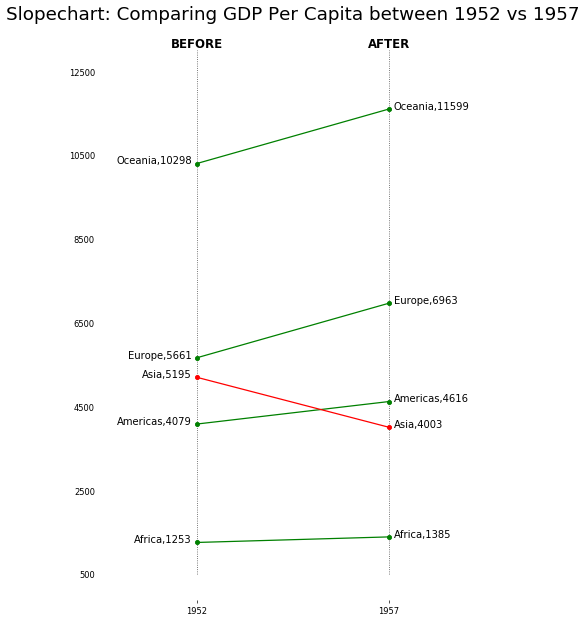

In [111]:
fig = plt.figure(figsize=(8,12),dpi=60)
ax = fig.add_axes((0.1,0.1,0.8,0.8))

# draw vline
ax.vlines(x=1, ymin=500,ymax=13000, 
          linestyles='dotted', color='k',alpha=.7, linewidth=1)
ax.vlines(x=3, ymin=500,ymax=13000, 
          linestyles='dotted', color='k',alpha=.7, linewidth=1)

# plot scatter
ax.scatter(x=np.repeat(1,df_raw.shape[0]),y=df_raw['1952'],
           s=10, color='k',alpha=.7)
ax.scatter(x=np.repeat(3,df_raw.shape[0]),y=df_raw['1957'],
           s=10, color='k',alpha=.7)

# connect points and put text 
for y1,y2,le,rg in zip(df_raw['1952'],df_raw['1957'],left_label,right_label):
    l = lines.Line2D([1,3],[y1,y2],
                 color='r' if y1>y2 else 'g',
                markersize=5,
                marker='o')
    ax.add_line(l)
    ax.text(1-0.05,y1,le,ha='right',fontsize=12)
    ax.text(3+0.05,y2,rg,ha='left',fontsize=12)

ax.text(1,13000,'BEFORE',
        fontsize=14,fontweight='semibold',va='bottom',ha='center')
ax.text(3,13000,'AFTER',
        fontsize=14,fontweight='semibold',va='bottom',ha='center')

# set xlim
ax.set_xlim(0,4)

# set xaxis tick
ax.xaxis.set_ticks(np.array([1,3]))
ax.xaxis.set_ticklabels(['1952','1957'])

# set yaxis tick
ax.yaxis.set_ticks(np.arange(500,13000,2000))

# set title
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957", 
             fontdict={'size':22})

# lighten yaxis ticks
for tick in ax.yaxis.get_major_ticks():
    tick.tick1line.set(visible=False)

# lighten borders
for spine in ax.spines.values():
    spine.set(alpha=0.0)

plt.show()

# 哑铃图

In [ ]:
import matplotlib.lines as lines

In [141]:
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/health.csv")

In [113]:
df_raw

,Area,pct_2014,pct_2013
0,Houston,0.19,0.22
1,Miami,0.19,0.24
2,Dallas,0.18,0.21
3,San Antonio,0.15,0.19
4,Atlanta,0.15,0.18
5,Los Angeles,0.14,0.20
6,Tampa,0.14,0.17
7,"Riverside, Calif.",0.14,0.19
8,Phoenix,0.13,0.17
9,Charlotte,0.13,0.15


In [142]:
df_raw.sort_values('pct_2014',inplace=True)
df_raw = df_raw.reset_index()

In [119]:
df_raw

,index,Area,pct_2014,pct_2013
0,25,Boston,0.04,0.04
1,23,Pittsburgh,0.06,0.07
2,22,Baltimore,0.06,0.09
3,24,Minneapolis,0.06,0.08
4,21,San Francisco,0.08,0.11
5,20,Seattle,0.08,0.12
6,19,Philadelphia,0.08,0.10
7,18,Detroit,0.09,0.11
8,17,St. Louis,0.09,0.10
9,16,Portland,0.09,0.13


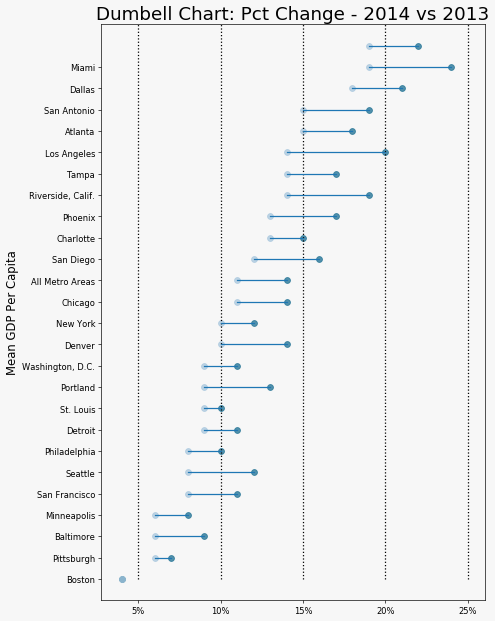

In [157]:
fig = plt.figure(figsize=(8,12),dpi=60)
ax = fig.add_axes((0.1,0.1,0.8,0.8))

# draw vlines
ax.vlines(x=0.05,ymin=0, ymax=28,linestyle='dotted')
ax.vlines(x=0.1,ymin=0, ymax=28,linestyle='dotted')
ax.vlines(x=0.15,ymin=0, ymax=28,linestyle='dotted')
ax.vlines(x=0.20,ymin=0, ymax=28,linestyle='dotted')
ax.vlines(x=0.25,ymin=0, ymax=28,linestyle='dotted')

# plot scatter
ax.scatter(df_raw['pct_2013'],df_raw.index,
           color='#0e668b',alpha=0.7,s=50)
ax.scatter(df_raw['pct_2014'],df_raw.index,
           color='#a3c4dc',alpha=0.7,s=50)

# contect points
for x1,x2,y in zip(df_raw.pct_2013,df_raw.pct_2014,df_raw.index):
    l = lines.Line2D([x1,x2],[y,y])
    ax.add_line(l)

# set axes background color 
ax.set(facecolor='#f7f7f7')
fig.set(facecolor='#f7f7f7')

# set xaxis tick
ax.xaxis.set_ticks(np.arange(0.05,0.3,0.05))
ax.xaxis.set_ticklabels(['5%','10%','15%','20%','25%'])

# set title
ax.set_title("Dumbell Chart: Pct Change - 2014 vs 2013", 
             fontsize=22)

# set y_label
ax.set_ylabel('Mean GDP Per Capita',fontsize=14)



# set yaxis tick
ax.set_ylim(-1,26)
ax.yaxis.set_ticks(range(25))
ax.yaxis.set_ticklabels(df_raw.Area)
plt.show()